In [87]:
%matplotlib notebook

In [88]:

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [89]:
Westcoarst_bus = pd.read_csv('MasterDnB.csv')

In [92]:
Westcoarst_bus

,DnB DUNS Num,DnB Bus Name,DnB Num Of UPS Accounts,DnB Active Ind,DnB Marketable Ind,DnB Subsidiary Cd,DnB Subsidiary Descr,DnB Bus Street,DnB Bus City Name,DnB Bus State Province Cd,...,DnB Bus Employees Total,DnB Employee Growth Pct,DnB Sales Growth Pct,DnB Bus Total Gross Revenue USD,DnB Primary SIC Industry 2 Cd,DnB Primary SIC Industry 2 Descr,DnB Primary SIC Industry 4 Cd,DnB Primary SIC Industry 4 Descr,DnB Bus Num Of Clients,DnB Bus Property Size
0,1000921,RELIABLE DRIVING SCH,0,1,1,1,Not a Subsidiary,1518 E PASSYUNK AVE,PHILADELPHIA,PA,...,2,0,0,55005.0,82,Educational Services,8299,Schools and Educational Services,0,0
1,1001119,"GRAM MAY OF N.J., INC.",0,1,1,1,Not a Subsidiary,101 US HIGHWAY 46 STE 136,PINE BROOK,NJ,...,1,0,0,48760.0,73,Business Services,7389,"Business Services, Nec",0,0
2,1001473,DAY'S EXCAVATING,0,1,1,1,Not a Subsidiary,5683 STATE ROUTE 308,KENNERDELL,PA,...,1,0,0,100000.0,17,Construction - Special Trade Contractors,1794,Excavation Work,0,0
3,1001689,REDFIELD'S WOOD'S & WATER TAXIDERMY,0,1,1,1,Not a Subsidiary,620 GEORGE HILL RD,CRANBERRY,PA,...,1,0,0,55074.0,76,Miscellaneous Repair Services,7699,"Repair Services, Nec",0,0
4,1001911,CREATIVE WEB INC,0,1,1,1,Not a Subsidiary,104 BRIGANTINE BLVD,WARETOWN,NJ,...,14,0,0,1295956.0,73,Business Services,7374,Data Processing and Preparation,0,0
5,1002737,VALLEY TABLE INC,0,1,1,1,Not a Subsidiary,152 POWELTON CIR,NEWBURGH,NY,...,2,0,0,251464.0,27,"Printing, Publishing and Allied Industries",2721,Periodicals,0,0
6,1002794,POWER LAWN MAINTENANCE & LANDSCAPING,0,1,1,1,Not a Subsidiary,201 NEW UNIONVILLE RD,WALLKILL,NY,...,2,0,0,55000.0,7,Agricultural Services,782,Lawn and Garden Services,0,0
7,1004944,TOWN OF HAMBURG,0,1,1,1,Not a Subsidiary,6100 S PARK AVE,HAMBURG,NY,...,396,0,0,0.0,91,"Executive, Legislative & General Government, E...",9111,Executive Offices,0,4000
8,1004972,TENOS REAL ESTATE,0,1,1,1,Not a Subsidiary,8001 ROWAN RD STE 209,CRANBERRY TOWNSHIP,PA,...,2,0,0,150018.0,65,Real Estate,6531,Real Estate Agents and Managers,0,0
9,1004980,WESTMORELAND INTERMEDIATE UNIT,0,1,1,1,Not a Subsidiary,215 DONOHOE RD,GREENSBURG,PA,...,70,0,0,1800843.0,82,Educational Services,8211,Elementary and Secondary Schools,0,0


In [93]:
# A snapshot look at all the columns
for col in Westcoarst_bus.columns:
    print(col)

DnB DUNS Num
DnB Bus Name
DnB Num Of UPS Accounts
DnB Active Ind
DnB Marketable Ind
DnB Subsidiary Cd
DnB Subsidiary Descr
DnB Bus Street
DnB Bus City Name
DnB Bus State Province Cd
DnB Bus Postal Code Main
DnB Bus Country Cd
DnB Latitude Num
DnB Longitude Num
DnB Bus Employees Here
DnB Bus Employees Total
DnB Employee Growth Pct
DnB Sales Growth Pct
DnB Bus Total Gross Revenue USD
DnB Primary SIC Industry 2 Cd
DnB Primary SIC Industry 2 Descr
DnB Primary SIC Industry 4 Cd
DnB Primary SIC Industry 4 Descr
DnB Bus Num Of Clients
DnB Bus Property Size


In [94]:
New_data = Westcoarst_bus.copy()

In [95]:
# pulling out relevant column from the giant csv files from dun and bradstreet
Business_df = New_data[["DnB Bus Name","DnB Num Of UPS Accounts","DnB Bus City Name",
                        "DnB Bus Postal Code Main","DnB Latitude Num","DnB Longitude Num","DnB Subsidiary Descr","DnB Bus Num Of Clients","DnB Bus Employees Here","DnB Employee Growth Pct",
                       "DnB Bus Employees Total","DnB Sales Growth Pct",
                       "DnB Bus Total Gross Revenue USD","DnB Primary SIC Industry 2 Descr","DnB Primary SIC Industry 4 Cd"]]

In [97]:
Clean_Busi_df = Business_df.rename(columns = {"DnB Bus Name":"Company Name","DnB Num Of UPS Accounts":"Num of UPS accounts","DnB Bus City Name":"City",
                        "DnB Bus Postal Code Main":"Postal Code","DnB Latitude Num":"Latitude","DnB Longitude Num":"Longitude","DnB Subsidiary Descr":"Subsidiary","DnB Bus Num Of Clients":"Num of Clients","DnB Bus Employees Here":"Employee Here","DnB Employee Growth Pct":"Employee Growth Pct",
                       "DnB Bus Employees Total":"Total Employee","DnB Sales Growth Pct":"Sales Growth",
                       "DnB Bus Total Gross Revenue USD":"Total Revenue in USD","DnB Primary SIC Industry 2 Descr":"Type of industry","DnB Primary SIC Industry 4 Cd":"Industry Sub-Segment"})

In [102]:
Clean_Busi_df

,Company Name,Num of UPS accounts,City,Postal Code,Latitude,Longitude,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,Type of industry,Industry Sub-Segment
0,RELIABLE DRIVING SCH,0,PHILADELPHIA,19147,39.93,-75.16,Not a Subsidiary,0,2,0,2,0,55005.0,Educational Services,8299
1,"GRAM MAY OF N.J., INC.",0,PINE BROOK,7058,40.86,-74.31,Not a Subsidiary,0,1,0,1,0,48760.0,Business Services,7389
2,DAY'S EXCAVATING,0,KENNERDELL,16374,41.24,-79.89,Not a Subsidiary,0,1,0,1,0,100000.0,Construction - Special Trade Contractors,1794
3,REDFIELD'S WOOD'S & WATER TAXIDERMY,0,CRANBERRY,16319,41.34,-79.63,Not a Subsidiary,0,1,0,1,0,55074.0,Miscellaneous Repair Services,7699
4,CREATIVE WEB INC,0,WARETOWN,8758,39.78,-74.23,Not a Subsidiary,0,14,0,14,0,1295956.0,Business Services,7374
5,VALLEY TABLE INC,0,NEWBURGH,12550,41.52,-74.02,Not a Subsidiary,0,2,0,2,0,251464.0,"Printing, Publishing and Allied Industries",2721
6,POWER LAWN MAINTENANCE & LANDSCAPING,0,WALLKILL,12589,41.62,-74.05,Not a Subsidiary,0,2,0,2,0,55000.0,Agricultural Services,782
7,TOWN OF HAMBURG,0,HAMBURG,14075,42.72,-78.82,Not a Subsidiary,0,250,0,396,0,0.0,"Executive, Legislative & General Government, E...",9111
8,TENOS REAL ESTATE,0,CRANBERRY TOWNSHIP,16066,40.70,-80.10,Not a Subsidiary,0,2,0,2,0,150018.0,Real Estate,6531
9,WESTMORELAND INTERMEDIATE UNIT,0,GREENSBURG,15601,40.30,-79.50,Not a Subsidiary,0,70,0,70,0,1800843.0,Educational Services,8211


In [99]:
Clean_Busi_df

,Company Name,Num of UPS accounts,City,Postal Code,Latitude,Longitude,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,Type of industry,Industry Sub-Segment
0,RELIABLE DRIVING SCH,0,PHILADELPHIA,19147,39.93,-75.16,Not a Subsidiary,0,2,0,2,0,55005.0,Educational Services,8299
1,"GRAM MAY OF N.J., INC.",0,PINE BROOK,7058,40.86,-74.31,Not a Subsidiary,0,1,0,1,0,48760.0,Business Services,7389
2,DAY'S EXCAVATING,0,KENNERDELL,16374,41.24,-79.89,Not a Subsidiary,0,1,0,1,0,100000.0,Construction - Special Trade Contractors,1794
3,REDFIELD'S WOOD'S & WATER TAXIDERMY,0,CRANBERRY,16319,41.34,-79.63,Not a Subsidiary,0,1,0,1,0,55074.0,Miscellaneous Repair Services,7699
4,CREATIVE WEB INC,0,WARETOWN,8758,39.78,-74.23,Not a Subsidiary,0,14,0,14,0,1295956.0,Business Services,7374
5,VALLEY TABLE INC,0,NEWBURGH,12550,41.52,-74.02,Not a Subsidiary,0,2,0,2,0,251464.0,"Printing, Publishing and Allied Industries",2721
6,POWER LAWN MAINTENANCE & LANDSCAPING,0,WALLKILL,12589,41.62,-74.05,Not a Subsidiary,0,2,0,2,0,55000.0,Agricultural Services,782
7,TOWN OF HAMBURG,0,HAMBURG,14075,42.72,-78.82,Not a Subsidiary,0,250,0,396,0,0.0,"Executive, Legislative & General Government, E...",9111
8,TENOS REAL ESTATE,0,CRANBERRY TOWNSHIP,16066,40.70,-80.10,Not a Subsidiary,0,2,0,2,0,150018.0,Real Estate,6531
9,WESTMORELAND INTERMEDIATE UNIT,0,GREENSBURG,15601,40.30,-79.50,Not a Subsidiary,0,70,0,70,0,1800843.0,Educational Services,8211


In [100]:
nn = Clean_Busi_df.sort_values(by=['Total Revenue in USD'], ascending=False)

In [101]:
nn

,Company Name,Num of UPS accounts,City,Postal Code,Latitude,Longitude,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,Type of industry,Industry Sub-Segment
1462479,TI GOTHAM INC.,0,NEW YORK,10281,40.71,-74.01,Subsidiary,0,2800,5,7560,0,2.146601e+09,"Printing, Publishing and Allied Industries",2721
1611175,"SAP AMERICA, INC.",0,NEWTOWN SQUARE,19073,39.98,-75.41,Subsidiary,0,1700,21,13888,0,2.143589e+09,Business Services,7371
1080944,EVEREST REINSURANCE COMPANY,0,LIBERTY CORNER,7938,40.66,-74.57,Subsidiary,0,5,0,377,0,2.133830e+09,Insurance Carriers,6331
912962,DORMITORY AUTHORITY - STATE OF NEW YORK,0,ALBANY,12207,42.65,-73.75,Not a Subsidiary,0,400,0,625,0,2.133442e+09,Membership Organizations,8611
406841,"BARNES & NOBLE BOOKSELLERS, INC.",0,NEW YORK,10036,40.75,-73.98,Subsidiary,0,300,0,28000,0,2.133191e+09,Miscellaneous Retail,5942
1639485,YORK INTERNATIONAL CORPORATION,0,YORK,17403,39.94,-76.74,Subsidiary,10000,1200,0,8000,0,2.121748e+09,Industrial and Commercial Machinery and Comput...,3585
1644471,AMERISOURCEBERGEN SERVICES CORPORATION,0,CHESTERBROOK,19087,40.06,-75.46,Subsidiary,18000,60,0,7400,0,2.109643e+09,Wholesale Trade - Durable Goods,5047
53648,PREMIER BRANDS GROUP HOLDINGS LLC,0,NEW YORK,10018,40.75,-73.98,Subsidiary,0,277,6,4350,0,2.093526e+09,"Apparel, Finished Products from Fabrics & Simi...",2337
6048,"UNITED REFINING, INC.",0,WARREN,16365,41.82,-79.12,Subsidiary,0,100,0,4617,0,2.086625e+09,Petroleum Refining and Related Industries,2911
1442497,UNITED REFINING COMPANY,0,WARREN,16365,41.82,-79.12,Subsidiary,0,201,0,4207,-23,2.086625e+09,Automotive Dealers and Gasoline Service Stations,5541


In [103]:
MLM = nn.drop(columns = ["Num of UPS accounts","City", "Postal Code", "Latitude","Longitude","Industry Sub-Segment"])

In [104]:
MLM

,Company Name,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,Type of industry
1462479,TI GOTHAM INC.,Subsidiary,0,2800,5,7560,0,2.146601e+09,"Printing, Publishing and Allied Industries"
1611175,"SAP AMERICA, INC.",Subsidiary,0,1700,21,13888,0,2.143589e+09,Business Services
1080944,EVEREST REINSURANCE COMPANY,Subsidiary,0,5,0,377,0,2.133830e+09,Insurance Carriers
912962,DORMITORY AUTHORITY - STATE OF NEW YORK,Not a Subsidiary,0,400,0,625,0,2.133442e+09,Membership Organizations
406841,"BARNES & NOBLE BOOKSELLERS, INC.",Subsidiary,0,300,0,28000,0,2.133191e+09,Miscellaneous Retail
1639485,YORK INTERNATIONAL CORPORATION,Subsidiary,10000,1200,0,8000,0,2.121748e+09,Industrial and Commercial Machinery and Comput...
1644471,AMERISOURCEBERGEN SERVICES CORPORATION,Subsidiary,18000,60,0,7400,0,2.109643e+09,Wholesale Trade - Durable Goods
53648,PREMIER BRANDS GROUP HOLDINGS LLC,Subsidiary,0,277,6,4350,0,2.093526e+09,"Apparel, Finished Products from Fabrics & Simi..."
6048,"UNITED REFINING, INC.",Subsidiary,0,100,0,4617,0,2.086625e+09,Petroleum Refining and Related Industries
1442497,UNITED REFINING COMPANY,Subsidiary,0,201,0,4207,-23,2.086625e+09,Automotive Dealers and Gasoline Service Stations


In [105]:
company_group = MLM.groupby('Type of industry')['Sales Growth'].mean()
com = company_group.sort_values(ascending = False)[:30]
#company_growth = company_group['Type of industry'].sum()[:50]

In [106]:
com

Type of industry
Membership Organizations                                        10.604579
Railroad Transportation                                          9.658621
Museums, Art Galleries and Botanical and Zoological Gardens      7.801917
Educational Services                                             7.309985
Chemicals and Allied Products                                    6.111092
Social Services                                                  5.103033
Electric, Gas and Sanitary Services                              2.714093
Holding and Other Investment Offices                             2.124888
Food and Kindred Products                                        2.042402
Communications                                                   1.790588
Transportation Equipment                                         1.763603
Lumber and Wood Products, Except Furniture                       1.759759
Mining and Quarrying of Nonmetallic Minerals, Except Fuels       1.645098
Stone, Clay, Glass, a

<IPython.core.display.Javascript object>


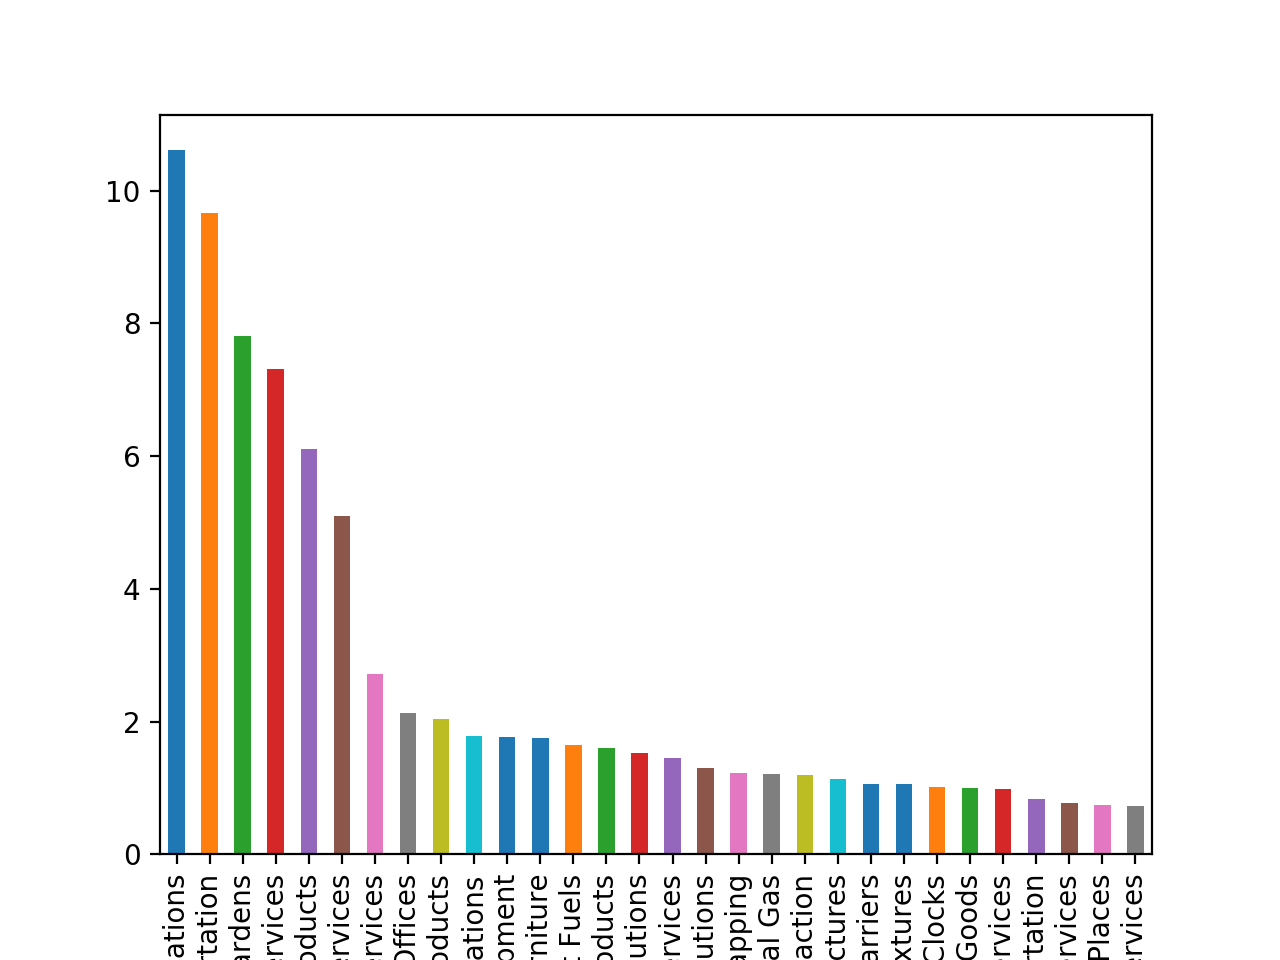

In [107]:
chart = com.plot(kind='bar')
plt.show()


In [108]:
MLM['Type of industry'].unique().shape

(82,)

In [109]:
company_group = MLM.groupby('Type of industry')['Total Revenue in USD'].mean()
Revenue = company_group.sort_values(ascending = False)[:50]

In [110]:
Revenue

Type of industry
Metal Mining                                                    4.603004e+07
Pipelines, Except Natural Gas                                   2.580842e+07
Chemicals and Allied Products                                   2.028939e+07
Petroleum Refining and Related Industries                       1.905968e+07
Primary Metal Industries                                        1.889964e+07
Coal Mining                                                     1.803496e+07
Paper and Allied Products                                       1.526520e+07
Mining and Quarrying of Nonmetallic Minerals, Except Fuels      1.435727e+07
Insurance Carriers                                              1.372450e+07
Tobacco Products                                                1.306771e+07
Transportation Equipment                                        1.207492e+07
Electronic & Other Electrical Equipment & Components            1.082194e+07
Rubber and Miscellaneous Plastic Products                  

In [114]:
MLM_rearrange = MLM[["Company Name","Subsidiary","Num of Clients","Employee Here","Employee Growth Pct","Total Employee","Sales Growth","Total Revenue in USD","Type of industry"]]

In [116]:
MLM_rearrange

,Company Name,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,Type of industry
1462479,TI GOTHAM INC.,Subsidiary,0,2800,5,7560,0,2.146601e+09,"Printing, Publishing and Allied Industries"
1611175,"SAP AMERICA, INC.",Subsidiary,0,1700,21,13888,0,2.143589e+09,Business Services
1080944,EVEREST REINSURANCE COMPANY,Subsidiary,0,5,0,377,0,2.133830e+09,Insurance Carriers
912962,DORMITORY AUTHORITY - STATE OF NEW YORK,Not a Subsidiary,0,400,0,625,0,2.133442e+09,Membership Organizations
406841,"BARNES & NOBLE BOOKSELLERS, INC.",Subsidiary,0,300,0,28000,0,2.133191e+09,Miscellaneous Retail
1639485,YORK INTERNATIONAL CORPORATION,Subsidiary,10000,1200,0,8000,0,2.121748e+09,Industrial and Commercial Machinery and Comput...
1644471,AMERISOURCEBERGEN SERVICES CORPORATION,Subsidiary,18000,60,0,7400,0,2.109643e+09,Wholesale Trade - Durable Goods
53648,PREMIER BRANDS GROUP HOLDINGS LLC,Subsidiary,0,277,6,4350,0,2.093526e+09,"Apparel, Finished Products from Fabrics & Simi..."
6048,"UNITED REFINING, INC.",Subsidiary,0,100,0,4617,0,2.086625e+09,Petroleum Refining and Related Industries
1442497,UNITED REFINING COMPANY,Subsidiary,0,201,0,4207,-23,2.086625e+09,Automotive Dealers and Gasoline Service Stations


In [119]:
MLM_reduced = MLM_rearrange.loc[(MLM_rearrange['Total Revenue in USD']) > 100000]

In [120]:
MLM_reduced.shape

(1015430, 9)

In [121]:
MLM_reduced.tail()

,Company Name,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,Type of industry
330305,"KAG ENTERPRISES, INC.",Not a Subsidiary,0,2,0,2,0,100001.0,"Engineering, Accounting, Research, and Managem..."
345903,VEGA & SONS LANDSCAPING AND CONSTRUCTION,Not a Subsidiary,0,1,0,1,0,100001.0,Construction - General Contractors & Operative...
1823319,LLG INC,Not a Subsidiary,0,1,0,1,0,100001.0,"Engineering, Accounting, Research, and Managem..."
1781786,MICHAEL FANTINA BUILDERS,Not a Subsidiary,0,1,0,1,0,100001.0,Construction - General Contractors & Operative...
1864883,SMALLING SCHOOL OF ARTS,Not a Subsidiary,0,1,0,1,0,100001.0,Amusement and Recreation Services


In [122]:
MLM_reduced['Type of industry'].unique().shape

(77,)